# Model Weight Analysis

In [20]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pickle as pickle
import pandas as pd
import numpy as np

import copy

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset

from src.trainer import CaseDataSet
from src.model import DLModels
from src.trainer import Trainer
from src.utils import TorchUtils

import plotly.graph_objects as go

In [3]:
model_hyper_para = {"w2v": {"input_size": 51,
                            "hidden_size": 128,
                            "num_layers": 1},
                    "st": {"input_size": 385,
                           "hidden_size": 512,
                           "num_layers": 1},
                    "onehot": {"input_size": 48,
                               "hidden_size": 128,
                               "num_layers": 1}}
model_folder_path = "../../Model/641620split/LSTM/LSTM"
embedding_type = ["w2v", "st", "onehot"]
model_type = ["source", "target"]
model_list = {}
for training_set_type in model_type:
    model_embedding_list = {}
    for embedding in embedding_type:
        model_experiment_list = []
        for i in range(10):
            training_prefix = "_T"
            if training_set_type == "source":
                training_prefix = "_S"
            hyper_para_prefix = "_h" + str(model_hyper_para[embedding]["hidden_size"]) + "_l1"
            file_name = model_folder_path + training_prefix + hyper_para_prefix + "_" + embedding + "_" + str(i) + ".LSTM"
            model = torch.load(file_name)
            model_experiment_list.append(model)
        model_embedding_list[embedding] = model_experiment_list
    model_list[training_set_type] = model_embedding_list

In [9]:
s_model_w2v = model_list["source"]["w2v"][5]
t_model_w2v = model_list["target"]["w2v"][6]

In [18]:
weight_diff = np.abs((s_model_w2v.lstm.weight_ih_l0 - t_model_w2v.lstm.weight_ih_l0).detach().cpu().numpy())

In [19]:
weight_diff

array([[0.14139168, 0.17257665, 0.2881989 , ..., 0.11637807, 0.44910598,
        0.51125765],
       [0.2941529 , 0.48642927, 1.3193233 , ..., 0.9688783 , 0.9929493 ,
        1.0521369 ],
       [0.469492  , 0.1836914 , 0.28188285, ..., 0.17332311, 0.24573281,
        0.09290752],
       ...,
       [0.07079446, 0.48370722, 0.34286982, ..., 0.04035561, 0.48882675,
        0.4676534 ],
       [0.07852915, 0.08881447, 0.01620468, ..., 0.21130483, 0.03465467,
        0.39320016],
       [0.30753195, 0.7432962 , 0.25512925, ..., 0.24519247, 0.45508063,
        0.9752203 ]], dtype=float32)

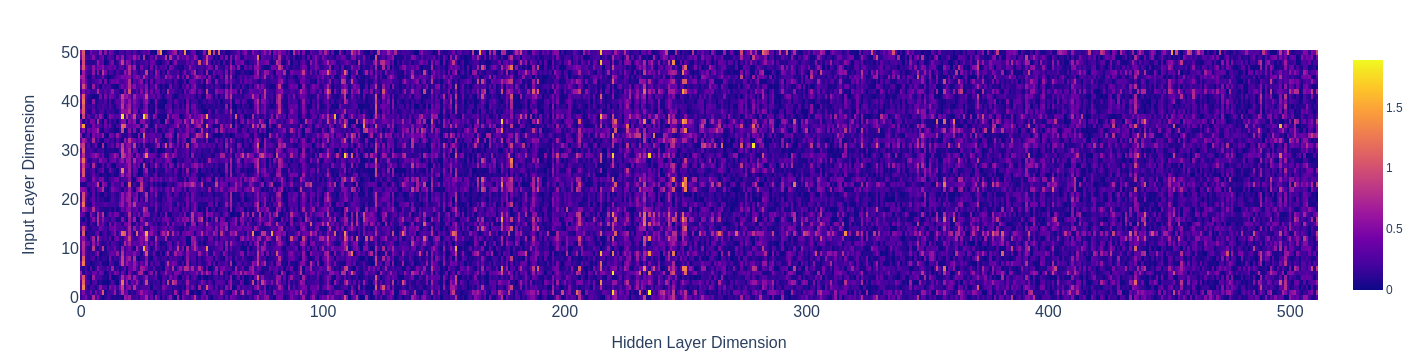

In [31]:
fig = go.Figure(data=go.Heatmap(
                   z=weight_diff.T,
                   hoverongaps = False))

fig.update_layout(
    title="",
    yaxis_title='Input Layer Dimension',
    xaxis_title='Hidden Layer Dimension',
    boxmode='group',
    bargap=0.5,
    bargroupgap=1,
    width=1000,
    height=300,
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis=dict(
        showgrid=True,  # Turn on Y-axis grid
        gridcolor='rgba(100, 100, 100, 0.3)',  # Customize grid color
        gridwidth=2,
        tickfont=dict(size=16),
        title_font=dict(size=16)
    ),
    margin=dict(l=80, r=100, b=30, t=50),
    xaxis=dict(
        tickfont=dict(size=16),
        title_font=dict(size=16)
    ),
    legend=dict(
        font=dict(size=16)  # Set legend font size
    ),
)

fig.show()
fig.write_image("../../Result/Fig/Weight_diff_w2v_ih.pdf")